In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Download raw html
!wget -q -O 'toronto_nb.html' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [3]:
# Read raw data using BeautifulSoup
from bs4 import BeautifulSoup
with open('toronto_nb.html') as raw:
    soup = BeautifulSoup(raw)


In [4]:
# Processing text data. Extract data that can be used to create data table
items = soup.table.get_text().replace('\n\n','').split('\n')
col_names = ['PostalCode', 'Borough', 'Neighborhood']
dat = items[3:]

In [5]:
# Since there are 3 columns, the number of row is the length of the items divided by 3
rows = len(items)//3

In [10]:
# Create 3 empty lists and add relevant data to the lists.
postcode = list()
borough = list()
neighborhood = list()
for row in range(0, rows-1):
    br = dat[row*3+1]
    if br == 'Not assigned':
        continue
    postcode.append(dat[row*3])
    borough.append(br)
    neighborhood.append(br) if (br!='Not assigned' and dat[row*3+2]=='Not assigned') else neighborhood.append(dat[row*3+2])

In [11]:
# Create a pandas dataframe based on the lists
df = pd.DataFrame(list(zip(postcode, borough, neighborhood)), columns=col_names)

In [12]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [13]:
# Conflate rows with identical postal code having multiple neighborhoods
merged_df = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()

In [14]:
merged_df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [15]:
# Print data shape
merged_df.shape

(103, 3)

In [16]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.0MB/s ta 0:00:01


In [17]:
import geocoder # import geocoder

In [18]:
lat = list()
long = list()

for code in merged_df.PostalCode:
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
      lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    lat.append(latitude)
    long.append(longitude)

In [19]:
merged_df['Latitude'] = lat
merged_df['Longitude'] = long

In [20]:
merged_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256
3,M1G,Scarborough,Woburn,43.768359,-79.217590
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440
5,M1J,Scarborough,Scarborough Village,43.743125,-79.231750
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.726245,-79.263670
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.713133,-79.285055
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.723575,-79.234976
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.696665,-79.260163


In [21]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [22]:
df = merged_df.drop(['PostalCode', 'Borough', 'Neighborhood'], axis=1)
df.head()

,Latitude,Longitude
0,43.811525,-79.195517
1,43.785730,-79.158750
2,43.765690,-79.175256
3,43.768359,-79.217590
4,43.769688,-79.239440


In [23]:
X = df.values[:,:]
cluster_dataset = StandardScaler().fit_transform(X)

In [24]:
cluster_num = 5
k_means = KMeans(init="k-means++", n_clusters=cluster_num, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
cluster_centers = k_means.cluster_centers_

In [25]:
df["Labels"] = labels
df.head(5)

,Latitude,Longitude,Labels
0,43.811525,-79.195517,4
1,43.785730,-79.158750,4
2,43.765690,-79.175256,4
3,43.768359,-79.217590,4
4,43.769688,-79.239440,4


In [26]:
print('Labels: ', labels)
print('Cluster Centers: ', cluster_centers)

Labels:  [4 4 4 4 4 4 0 0 4 0 4 0 4 4 4 4 4 4 0 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 0 0 0
 3 0 0 3 3 3 3 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 2 2 3
 3 3 3 3 3 2 2 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2]
Cluster Centers:  [[ 0.52916518  0.42316501]
 [-1.11474625 -1.2483989 ]
 [ 0.53492155 -1.15190282]
 [-0.80529214  0.10264858]
 [ 1.49166397  1.5759195 ]]


In [27]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

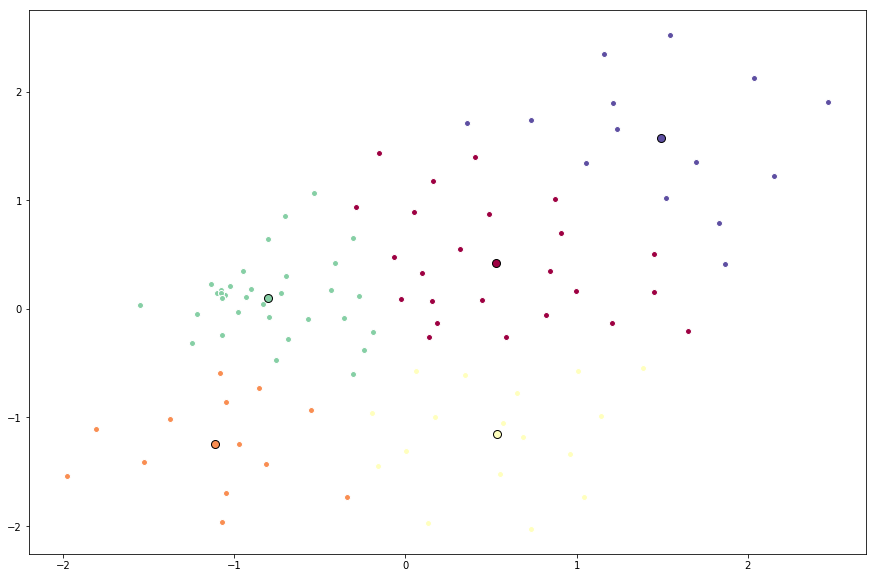

In [28]:
fig = plt.figure(figsize=(15, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
ax = fig.add_subplot(1, 1, 1)
for k, cluster_center, color in zip(range(cluster_num), cluster_centers, colors):
    ax.plot(cluster_dataset[labels==k, 0], cluster_dataset[labels==k, 1], 'w', markerfacecolor=color, marker='.', markersize=12)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markeredgecolor='k', markerfacecolor=color, markersize=8)
plt.show()